<a href="https://colab.research.google.com/github/Arindam2002/tensorflow_learning/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intronfuction to Regression with Neural Networks in TensorFlow

In [96]:
import tensorflow as tf
print(tf.__version__)

2.8.2


## Creating data to view and fit

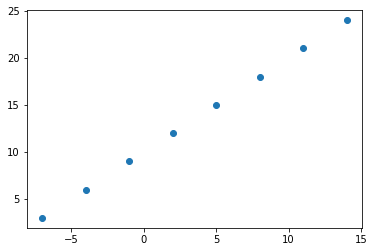

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Creating features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y )

In [98]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [99]:
# Create a demo tensor for housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [100]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [101]:
X[0].ndim

0

In [102]:
X[0], y[0]

(-7.0, 3.0)

In [103]:
# Turn our NumPy arrays to tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [104]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

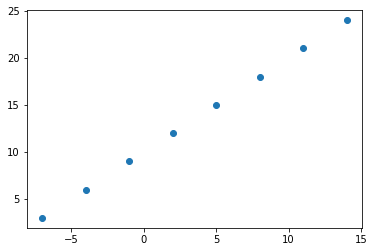

In [105]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - Defining input, hidden and dense layers of the deep learning model
2. **Compiling a model** - define the loss function, the optimizer and evaluation metrics
3. Fitting a model

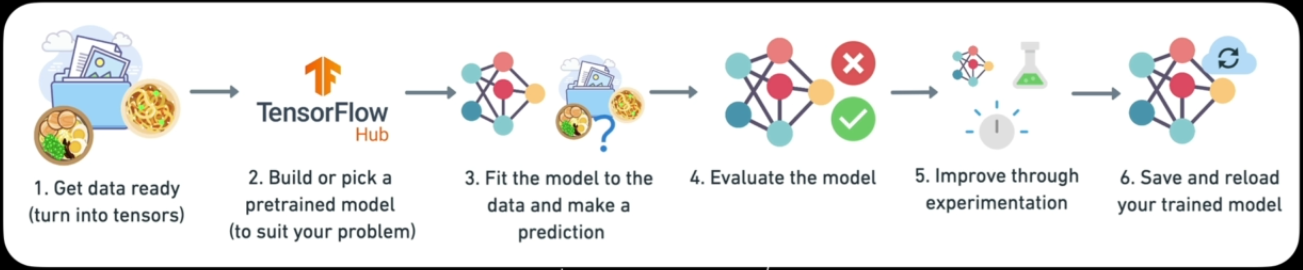


In [106]:
tf. random.set_seed(42)

# 1. Creating a modell using Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 240ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [107]:
# Try and make a prediction
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [108]:
y_pred + 11     # 11 since loss in last epoch was 10.97 (for 5 epochs)

array([[23.71602]], dtype=float32)

## Improving our model

By altering the steps we took to create a model.

1. **Creating the model**:
    * Add more layers
    * Increase the number of hidden units(neurons) within each hidden layer
    * Change the activation function of each layer
2. **Compiling the model**:
    * Change the optimization function

        *or*
    * the **learning rate** of the optimization function
    
    ⭐**Learning rate is the most important hyperparameter in most neural networks**
    
3. **Fitting the model**:
    * Fit the model for **more epochs**
    * Give the model more data to learn from

In [109]:
# Rebuilding our model (Train for larger epochs) #1

# 1.Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (Train for larger epochs)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 241ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 

In [110]:
# Original data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [111]:
# Checking the improved prediction
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [112]:
# Rebuilding the model (Trying each of the above points mentioned to improve the model)

# 1. Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation=None))
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(lr=0.01))

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 305ms/step - loss: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4149
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 9.0103
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.3316
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 7.4673
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 7.5285
Epoch 13/100
1/1 [==============================] - 0s 9ms/step -

In [113]:
# Original data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [114]:
# Prediction
model.predict([17.0])

array([[26.583801]], dtype=float32)

## Evaluating a model

In practice, a typical workflow when building a neural network is:

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> ...
```

When it comes to evaluation:
>"Visualize, Visualize, Visualize,"

It's a good idea to visualize:
* The data
    * What data are we working with?
    * What does it look like?
* The model itself:
    * What does our model look like?
* The training of a model
    * How does a model perform while it learns?
* The predictions of the model
    * How do the predictions of the model line up against the ground truth (the original labels)?

In [115]:
#  Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [116]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

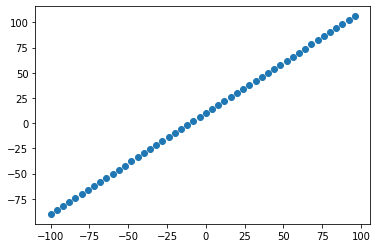

In [117]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set**: The model learns from this data (typically 70-80% of the total data available to us)

* **Validation set**: The model gets tuned on this data (typically 10-15% of the available data)

* **Test data**: The model gets evaluated on this data to test what it has learned (typically 10-15% of the available data)

In [118]:
# How many smamples we have
len(X)

50

In [119]:
# Split the data into train and test sets
X_train = X[:40] 
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize again!

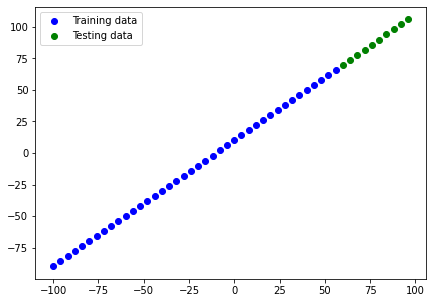

In [120]:
plt.figure(figsize=(7, 5))

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")

# Show a legend
plt.legend()

In [121]:
# Building a neural net for our data

# 1. Create a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# # 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [122]:
# model.summary()  # Will throw an error cause the model hasn't been "built" yet

In [123]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [124]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)
# 1. Create a model
model = tf.keras.Sequential(name="model_1")
model.add(tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"))
model.add(tf.keras.layers.Dense(1, name="output_layer"))

# 2. Compile
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [125]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [126]:
# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

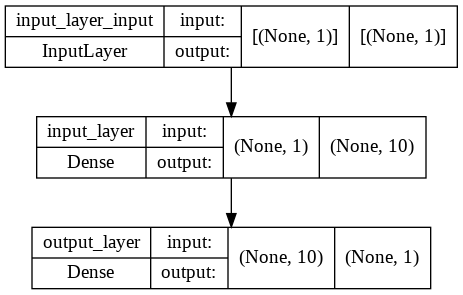

In [127]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our models predictions

In [128]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55219 ],
       [ 75.139915],
       [ 79.72764 ],
       [ 84.31536 ],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66626 ],
       [107.253975],
       [111.841705]], dtype=float32)

In [129]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [130]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training data, test data & compares predictions to ground truth labels
    """

    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")

    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")

    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")

    # Show legend
    plt.legend()

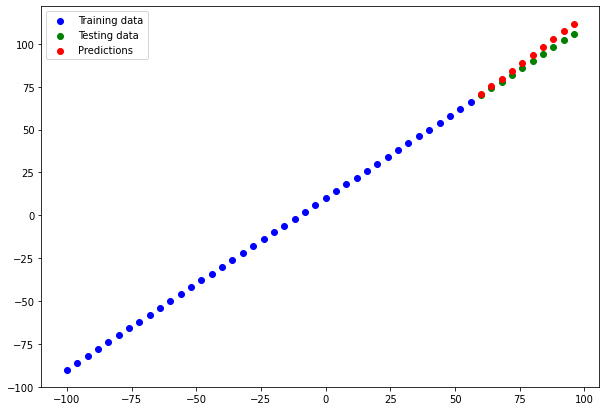

In [131]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

### Evalutating our model's predictions with regression evaluation metrics

Depending on the problem, there will be different evaluation metrics to evaluate the model's performance.

Since we're working on a regression, two of the main metrics are:
* MAE: "On avg., how wrong is each of the model's prediction"

* MSE: "Square the avg. errors"

In [132]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 98ms/step - loss: 3.1969 - mae: 3.1969


[3.196946620941162, 3.196946620941162]

In [133]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558247, 14.116051, 11.708944, 10.336927, 10.      , 10.698161,
       12.447118, 15.333008, 19.253975, 23.841705], dtype=float32)>

In [134]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55219 ],
       [ 75.139915],
       [ 79.72764 ],
       [ 84.31536 ],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66626 ],
       [107.253975],
       [111.841705]], dtype=float32)>

In [135]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [136]:
# Make y_pred in same shape as y_test
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55219 ,  75.139915,  79.72764 ,  84.31536 ,  88.90308 ,
        93.49081 ,  98.07853 , 102.66626 , 107.253975, 111.841705],
      dtype=float32)>

In [137]:
# Calc the mae
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969466>

In [138]:
# Calc the mse
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070175>

In [139]:
# Make some functions to reuse MAE & MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=y_pred)

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=y_pred)

### Running experiments to improve our model (by methods mentioned earlier)

Let's do 3 modelling eperiments:

1. `model_1`: Same as original model - 1 layer, trained for 100 epochs.
2. `model_2`: 2 layers, trained for 100 epochs
3. `model_3`: 2 layers, trained for 500 epochs

**Build `model_1`**

In [140]:
from tensorflow.keras.layers import Dense
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential()
model_1.add(Dense(units=1, input_shape=(1,)))

# 2. Compile the model
model_1.compile(loss="mae", optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - l

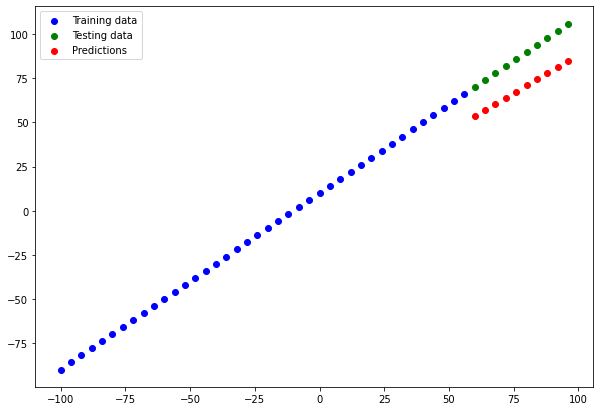

In [141]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [142]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.5734>)

**Build `model_2`**

In [143]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model_2
model_2 = tf.keras.Sequential()
model_2.add(Dense(units = 10, input_shape=(1,)))
model_2.add(Dense(units=1))

# 2. Compile model_2
model_2.compile(loss="mae", optimizer = tf.keras.optimizers.SGD(), metrics=["mse"])

# Fit model_2
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4058 - mse: 1084.1481
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 40.4763 - mse: 2586.0081
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 27.8687 - mse: 1094.4379
Epoch 11/100
2/2 [==========================

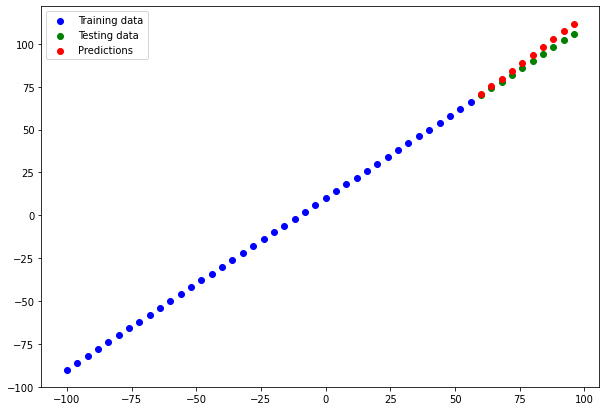

In [144]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [145]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, tf.squeeze(y_preds_2))
mse_2 = mse(y_test, tf.squeeze(y_preds_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969466>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070175>)

**Build `model_3`**

In [146]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model_3
model_3 = tf.keras.Sequential()
model_3.add(Dense(units = 10, input_shape=(1,)))
model_3.add(Dense(units=1))

# 2. Compile model_3
model_3.compile(loss="mae", optimizer = tf.keras.optimizers.SGD(), metrics=["mae"])

# Fit model_3
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/500
2/2 [==============================] - 0s 7ms/

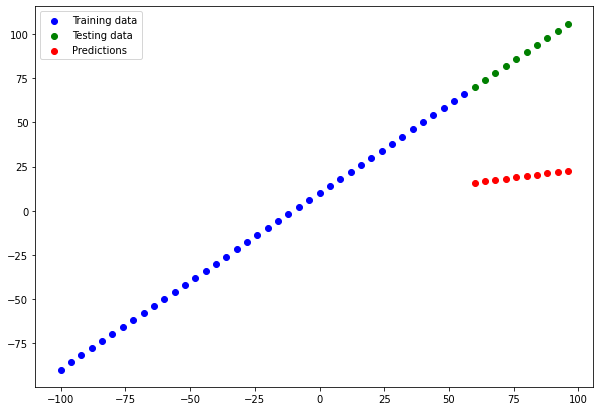

In [147]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [148]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, tf.squeeze(y_preds_3))
mse_3 = mse(y_test, tf.squeeze(y_preds_3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.71362>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0283>)

## Comparing the results of our experiments

In [149]:
# Compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "MAE", "MSE"])
all_results

,model,MAE,MSE
0,model_1,18.745327,353.573395
1,model_2,3.196947,13.070175
2,model_3,68.713623,4808.028320


From above we can conclude that `model_2` performed thee best...

In [150]:
model_2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                20        
                                                                 
 dense_37 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Tracking your experiments

As we build more models, we might wanna look into using:
* TensorBoard - a component of the TensorFlow library to help track modelling experiments

* Weights & Biases - tool for tracking all kinds of ML experiments

## Saving our models

1. SavedModel format
2. HDF5 format

In [151]:
# Save model (SavedModel format)
model_2.save("model_2_in_01_notebook")

INFO:tensorflow:Assets written to: model_2_in_01_notebook/assets


In [152]:
# Save model (HDF5 format)
model_2.save("model_2_in_01_notebook_HDF5_format.h5")

## Loading in a saved model

In [153]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/model_2_in_01_notebook")
loaded_SavedModel_format.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                20        
                                                                 
 dense_37 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [154]:
model_2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                20        
                                                                 
 dense_37 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [155]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [156]:
# Load in the H5 format model
loaded_h5_model = tf.keras.models.load_model("/content/model_2_in_01_notebook_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                20        
                                                                 
 dense_37 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [157]:
model_2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                20        
                                                                 
 dense_37 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [158]:
# Compare model_2 predictions with h5 format model predictions
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A larger example

In [159]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt

In [160]:
# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [161]:
# One-hot encode our DataFrame so that it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [162]:
# Create X & y values (features & labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [163]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [164]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [165]:
#  Create training & test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [166]:
#  Build a neural network
tf.random.set_seed(42)

# 1. Create the model
insurance_model = tf.keras.Sequential()

insurance_model.add(Dense(units=10))
insurance_model.add(Dense(units=1))

# 2. Compile the model
insurance_model.compile(loss="mae",
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))    # Either write validation parameter here or evaluate separately like the cell below

Epoch 1/100
34/34 [==============================] - 0s 7ms/step - loss: 8637.1006 - mae: 8637.1006 - val_loss: 8465.6328 - val_mae: 8465.6328
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7886.7759 - mae: 7886.7759 - val_loss: 8144.6074 - val_mae: 8144.6074
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7558.1470 - mae: 7558.1470 - val_loss: 7211.8311 - val_mae: 7211.8311
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7792.0225 - mae: 7792.0225 - val_loss: 7069.4854 - val_mae: 7069.4854
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7748.3887 - mae: 7748.3887 - val_loss: 7052.2373 - val_mae: 7052.2373
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7595.3945 - mae: 7595.3945 - val_loss: 7617.1992 - val_mae: 7617.1992
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7589.9844 - mae: 7589.9844 - val_loss: 7792.2358 - val_mae: 7792.2358

In [167]:
# Check the results of the insurance_model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

> Right now our model isn't performing well... let's try and improve it! Lessgooooo...!!

In [168]:
#  Build a neural network
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential()

insurance_model_2.add(Dense(units=512))
insurance_model_2.add(Dense(units=1))

# 2. Compile the model
insurance_model_2.compile(loss="mae",
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))    # Either write validation parameter here or evaluate separately like the cell below

Epoch 1/100
34/34 [==============================] - 0s 6ms/step - loss: 8580.7334 - mae: 8580.7334 - val_loss: 8465.6289 - val_mae: 8465.6289
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7883.1899 - mae: 7883.1899 - val_loss: 8037.7344 - val_mae: 8037.7344
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7572.9863 - mae: 7572.9863 - val_loss: 7105.5967 - val_mae: 7105.5967
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7669.8057 - mae: 7669.8057 - val_loss: 6862.2012 - val_mae: 6862.2012
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7673.5093 - mae: 7673.5093 - val_loss: 6930.9038 - val_mae: 6930.9038
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7656.7319 - mae: 7656.7319 - val_loss: 7250.0747 - val_mae: 7250.0747
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7573.0439 - mae: 7573.0439 - val_loss: 7123.0259 - val_mae: 7123.0259

In [169]:
from google.colab.output import eval_js
eval_js('google.colab.output.setIframeHeight("300")')

#  Build a neural network
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential()

insurance_model_3.add(Dense(units=512, activation="relu"))
insurance_model_3.add(Dense(units=512, activation="relu"))
insurance_model_3.add(Dense(units=1))

# 2. Compile the model
insurance_model_3.compile(loss="mae",
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
34/34 [==============================] - 1s 7ms/step - loss: 13114.5352 - mae: 13114.5352 - val_loss: 12212.8125 - val_mae: 12212.8125
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 11023.1670 - mae: 11023.1670 - val_loss: 8458.9404 - val_mae: 8458.9404
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 7654.7954 - mae: 7654.7954 - val_loss: 7676.2471 - val_mae: 7676.2471
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 7423.2129 - mae: 7423.2129 - val_loss: 7506.2104 - val_mae: 7506.2104
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 7334.2471 - mae: 7334.2471 - val_loss: 7402.1143 - val_mae: 7402.1143
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 7266.6499 - mae: 7266.6499 - val_loss: 7331.4238 - val_mae: 7331.4238
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 7179.0615 - mae: 7179.0615 - val_loss: 7198.9287 - val_mae: 719

Text(0.5, 0, 'epochs')

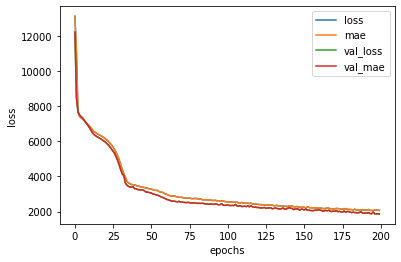

In [170]:
# Plot history (aka loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalization and standardization)

* In terms of scaling values, neural networks prefer normalization

In [171]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [172]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),  # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) & OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [173]:
# Originally
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [174]:
# What does our data look like now?
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [175]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

> Great! Our data has been normalized and one hot encoded now. Let's build a neural network model on it!

In [184]:
#  Build a neural network
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential()

insurance_model_4.add(Dense(units=512, activation="relu"))
insurance_model_4.add(Dense(units=512, activation="relu"))
insurance_model_4.add(Dense(units=1))

# 2. Compile the model
insurance_model_4.compile(loss="mae",
                        optimizer=tf.keras.optimizers.Adam(lr=0.01),
                        metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=200, validation_data=(X_test_normal, y_test))

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - 1s 12ms/step - loss: 10834.2441 - mae: 10834.2441 - val_loss: 8224.0674 - val_mae: 8224.0674
Epoch 2/200
34/34 [==============================] - 0s 6ms/step - loss: 6906.0317 - mae: 6906.0317 - val_loss: 5581.9741 - val_mae: 5581.9741
Epoch 3/200
34/34 [==============================] - 0s 7ms/step - loss: 4125.5908 - mae: 4125.5908 - val_loss: 3256.1838 - val_mae: 3256.1838
Epoch 4/200
34/34 [==============================] - 0s 6ms/step - loss: 3429.4482 - mae: 3429.4482 - val_loss: 3007.1560 - val_mae: 3007.1560
Epoch 5/200
34/34 [==============================] - 0s 7ms/step - loss: 3328.4675 - mae: 3328.4675 - val_loss: 3079.8765 - val_mae: 3079.8765
Epoch 6/200
34/34 [==============================] - 0s 6ms/step - loss: 3343.7700 - mae: 3343.7700 - val_loss: 2966.8850 - val_mae: 2966.8850
Epoch 7/200
34/34 [==============================] - 0s 7ms/step - loss: 3256.4189 - mae: 3256.4189 - val_loss: 2941.9834 - val_mae: 2941.9834
Epoch 8/

## Committing this notebook to github repo

In [192]:
!git add .

In [193]:
!git

usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone      Clone a repository into a new directory
   init       Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add        Add file contents to the index
   mv         Move or rename a file, a directory, or a symlink
   reset      Reset current HEAD to the specified state
   rm         Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect     Use binary search to find the commit that introduced a bug
   grep       Prin